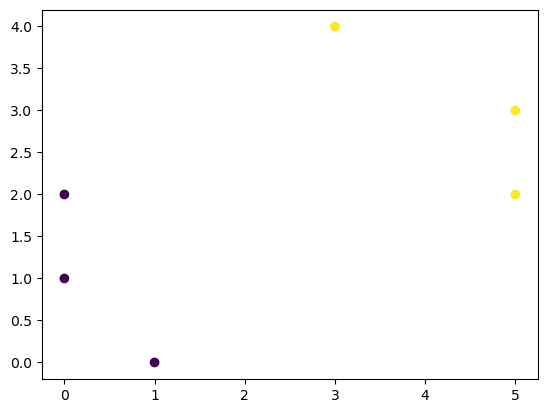

In [119]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([
    [0, 2],
    [0, 1],
    [1, 0],
    [3, 4],
    [5, 2],
    [5, 3]
])

y = np.array([
    [-1],
    [-1],
    [-1],
    [1],
    [1],
    [1]
])


In [120]:
from sklearn.metrics.pairwise import *
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from numpy.linalg import norm

In [161]:
# L shape = (6,1)
g = 0.01
u1 = 0.1
u2 = 5
K = polynomial_kernel(X, degree = 3, gamma = g)
Y = np.diagflat(y)
L = np.random.randn(6,1)
print(type(L[0,0]))
alpha = 0.0001

<class 'numpy.float64'>


In [162]:
def f(L, Y, K, u1, y):
    f_star = ((1/2)*L.T@Y@K@Y@L) + (u1*(L.T@y)*(L.T@y)) - (np.ones((6,1)).T @ L)
    return f_star

def grad_f(L, Y, K, u1, y):
    dL = np.zeros((6,1))
    dL[L<0] = -1
    df = Y@K@Y@L + 2*u1*(L.T@y)*y - np.ones((6,1)) + np.ones((6,1)).T @ dL
    return df

for i in range(10000):
    grad = grad_f(L, Y, K, u1, y)
    L = L - alpha * grad
    f_star = f(L, Y, K, u1, y)
    if i % 1000 == 0:
        print(f"Iteration {i}, f_star = {f_star}, L norm = {np.linalg.norm(L)}, grad = {grad}")
    

Iteration 0, f_star = [[2.70457499]], L norm = 2.9619119105316756, grad = [[-1.65570961]
 [-1.65570961]
 [-1.4284339 ]
 [-7.09905207]
 [-7.73199391]
 [-7.73199391]]
Iteration 1000, f_star = [[-2.69602166]], L norm = 3.120711733705382, grad = [[-2.98010839]
 [-2.98010839]
 [-2.99507081]
 [-4.97915321]
 [-4.96031628]
 [-4.96031628]]
Iteration 2000, f_star = [[-4.32619547]], L norm = 3.4736524820024814, grad = [[-2.3780918 ]
 [-2.3780918 ]
 [-2.52590224]
 [-3.14448618]
 [-2.76719491]
 [-2.76719491]]
Iteration 3000, f_star = [[-5.18113528]], L norm = 3.8874160465906415, grad = [[-2.42028264]
 [-2.42028264]
 [-2.66403554]
 [-2.78666597]
 [-2.14988175]
 [-2.14988175]]
Iteration 4000, f_star = [[-5.56118557]], L norm = 4.175420124860618, grad = [[-1.34356711]
 [-1.34356711]
 [-1.63554529]
 [-1.70482109]
 [-0.93784166]
 [-0.93784166]]
Iteration 5000, f_star = [[-5.82969255]], L norm = 4.440121034732348, grad = [[-1.24993682]
 [-1.24993682]
 [-1.58004878]
 [-1.6731682 ]
 [-0.80348646]
 [-0.8034

In [163]:
y_hat = K@(L*y)
# Indices of negative samples
neg_idx = np.where(y.ravel() == -1)[0]  
# Indices of positive samples
pos_idx = np.where(y.ravel() ==  1)[0]

neg_side = np.max(y_hat[neg_idx])
pos_side = np.min(y_hat[pos_idx])

b = (pos_side + neg_side)/2
y_hat = np.sign(K@(L*y) + b)
print("Accuracy: ", accuracy_score(y, y_hat))

Accuracy:  1.0


NameError: name 'X' is not defined